In [ ]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim

# Datos

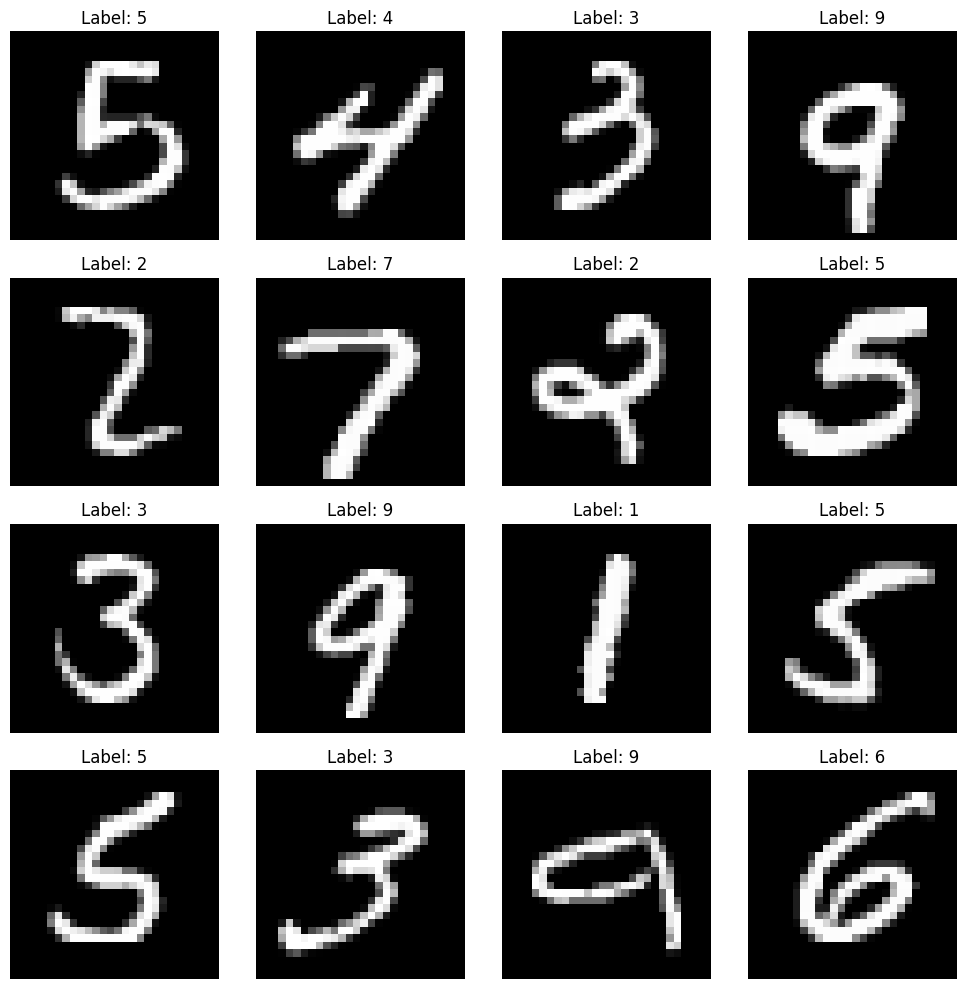

In [ ]:

# Load MNIST dataset
# Definimos una secuencia de transformaciones para aplicar a las imágenes del dataset.
# En este caso, solo convertimos las imágenes a tensores utilizando `ToTensor()`.
# Esto es necesario para que las imágenes estén en un formato compatible con PyTorch.
transform = transforms.Compose([
    transforms.ToTensor()  # Convierte la imagen de un formato PIL o numpy.ndarray a un tensor.
])

# Cargamos el dataset MNIST de entrenamiento.
# `root='./data'` especifica el directorio donde se descargarán los datos si no están presentes.
# `train=True` indica que queremos el conjunto de datos de entrenamiento.
# `transform=transform` aplica las transformaciones definidas previamente a cada imagen.
# `download=True` descarga los datos si no están disponibles en el directorio especificado.
mnist_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Creamos un DataLoader que nos permite cargar los datos en lotes pequeños.
# `dataset=mnist_dataset` es el dataset que se cargará.
# `batch_size=16` indica que cada lote contendrá 16 imágenes y etiquetas.
# `shuffle=True` mezcla los datos aleatoriamente en cada época, mejorando la generalización del modelo.
data_loader = DataLoader(
    mnist_dataset, batch_size=16, shuffle=True
)

# Obtenemos un único lote de datos del DataLoader.
# `next(iter(data_loader))` convierte el DataLoader en un iterador y toma el primer lote.
# El lote contiene `images` (los tensores de las imágenes) y `labels` (las etiquetas correspondientes).
images, labels = next(iter(data_loader))


# Plot the images in a grid
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'Label: {labels[i].item()}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Arquitectura

In [ ]:
# Definimos el modelo MLP
# MLP hereda de nn.Module, lo que permite utilizar las funciones y propiedades de PyTorch
# para crear, entrenar y evaluar redes neuronales.
class MLP(nn.Module):
    def __init__(self):
        # Inicializamos la clase base nn.Module
        # Esto habilita funciones esenciales como la gestión de capas y forward pass.
        super(MLP, self).__init__()
        # Capa completamente conectada: de entrada (28x28 píxeles) a 300 neuronas
        self.fc1 = nn.Linear(28 * 28, 300)
        # Capa oculta: de 300 neuronas a 250 neuronas
        self.fc2 = nn.Linear(300, 250)
        # Capa oculta: de 250 neuronas a 200 neuronas
        self.fc3 = nn.Linear(250, 200)
        # Capa oculta: de 200 neuronas a 100 neuronas
        self.fc4 = nn.Linear(200, 100)
        # Capa de salida: de 100 neuronas a 10 clases (números del 0 al 9)
        self.fc5 = nn.Linear(100, 10)
        # Función de activación Sigmoid
        self.sigmo = nn.Sigmoid()
        # Dropout para evitar sobreajuste
        self.dropout = nn.Dropout(0.2)

    # Definimos cómo pasa la información a través de la red
    # Este método es obligatorio en las clases que heredan de nn.Module.
    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Aplanamos las imágenes (de 28x28 a 1D)
        x = self.sigmo(self.fc1(x))  # Aplicamos la primera capa y Sigmoid
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.sigmo(self.fc2(x))  # Aplicamos la segunda capa y Sigmoid
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.sigmo(self.fc3(x))  # Aplicamos la tercera capa y Sigmoid
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.sigmo(self.fc4(x))  # Aplicamos la cuarta capa y Sigmoid
        x = self.dropout(x)         # Aplicamos Dropout
        x = self.fc5(x)             # Aplicamos la capa de salida
        return x

1.   Cambios Arquitectura: <br>
*  Se modifica numero de neuronas.
*  Se agregan 2 capas ocultas.
* Se modifica la funcion de activacion (de ReLU a Sigmoid)
2. Resultado del Entrenamiento con los cambios en la Arquitectura:
*  Resultado del codigo Original: <br>
Época [1/10], Pérdida: 0.1013
Época [2/10], Pérdida: 0.4886
Época [3/10], Pérdida: 0.1079
Época [4/10], Pérdida: 0.1014
Época [5/10], Pérdida: 0.1407
Época [6/10], Pérdida: 0.0135
Época [7/10], Pérdida: 0.1032
Época [8/10], Pérdida: 0.0329
Época [9/10], Pérdida: 0.0097
Época [10/10], Pérdida: 0.1025 <br>
 Accuracy en el conjunto de prueba: 97.67%
* Resultado con los cambios en la Arquitectura: <br>
Época [1/10], Pérdida: 0.2611
Época [2/10], Pérdida: 0.3082
Época [3/10], Pérdida: 0.1632
Época [4/10], Pérdida: 0.1430
Época [5/10], Pérdida: 0.3945
Época [6/10], Pérdida: 0.0142
Época [7/10], Pérdida: 0.3109
Época [8/10], Pérdida: 0.1578
Época [9/10], Pérdida: 0.0223
Época [10/10], Pérdida: 0.0581 <br>
Accuracy en el conjunto de prueba: 97.38%
3. Conclusion: <br>
* Con los cambios realizados en la arquitectura, el nuevo valor resultante en  la epoca 10/10 tiene un menor valor de perdida
* Sin embargo el resultado del Accuracy en el conjunto de prueba es: 97.36%, disminuyendo el porcentaje de imagenes bien clasificadas en un 0.29%

# Entrenamiento

In [ ]:
# Hiperparámetros
batch_size = 64       # Tamaño de lote
learning_rate = 0.001 # Tasa de aprendizaje
epochs = 10           # Número de épocas de entrenamiento

# Preprocesamiento y carga de datos de MNIST
transform = transforms.Compose([
    transforms.ToTensor(),                 # Convertimos imágenes a tensores
    transforms.Normalize((0.5,), (0.5,))  # Normalizamos a media 0 y varianza 1
])
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transform, download=True)  # Dataset de entrenamiento
test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transform, download=True)  # Dataset de prueba
train_loader = DataLoader(
    dataset=train_dataset, batch_size=batch_size, shuffle=True)  # Dataloader para entrenamiento
test_loader = DataLoader(
    dataset=test_dataset, batch_size=batch_size, shuffle=False)  # Dataloader para prueba

# Definimos el modelo, la función de pérdida y el optimizador
model = MLP()                             # Creamos una instancia del modelo MLP
criterion = nn.CrossEntropyLoss()         # Función de pérdida para clasificación
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)  # Optimizador Adam
optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)  # Optimizador RMSprop

# Bucle de entrenamiento
for epoch in range(epochs):
    model.train()  # Ponemos el modelo en modo entrenamiento
    for images, labels in train_loader:  # Iteramos sobre lotes de datos
        optimizer.zero_grad()            # Reiniciamos los gradientes
        outputs = model(images)          # Hacemos una predicción con el modelo
        loss = criterion(outputs, labels)  # Calculamos la pérdida
        loss.backward()                  # Propagamos los gradientes
        optimizer.step()                 # Actualizamos los pesos del modelo

    # Mostramos la pérdida al final de cada época
    print(f"Época [{epoch+1}/{epochs}], Pérdida: {loss.item():.4f}")



Época [1/10], Pérdida: 0.1854
Época [2/10], Pérdida: 0.4280
Época [3/10], Pérdida: 0.1477
Época [4/10], Pérdida: 0.4777
Época [5/10], Pérdida: 0.1794
Época [6/10], Pérdida: 0.2405
Época [7/10], Pérdida: 0.0236
Época [8/10], Pérdida: 0.0339
Época [9/10], Pérdida: 0.2076
Época [10/10], Pérdida: 0.0054


1.   Cambios en el Entrenamiento (1er cambio):
*  Se modifica tamaño del lote (batch size) de 64 a 128
*  El Learning Rate de 0.001 a 0.005
*  Numero de Epocas de 10 a 20
2. Resultado del Entrenamiento con los cambios en los parametros el codigo de Entrenamiento: <br>
Época [1/20], Pérdida: 0.3766
Época [2/20], Pérdida: 0.3367
Época [3/20], Pérdida: 0.2711
Época [4/20], Pérdida: 0.3167
Época [5/20], Pérdida: 0.2356
Época [6/20], Pérdida: 0.3453
Época [7/20], Pérdida: 0.2905
Época [8/20], Pérdida: 0.3418
Época [9/20], Pérdida: 0.1250
Época [10/20], Pérdida: 0.2420
Época [11/20], Pérdida: 0.2353
Época [12/20], Pérdida: 0.1830
Época [13/20], Pérdida: 0.2759
Época [14/20], Pérdida: 0.2987
Época [15/20], Pérdida: 0.1494
Época [16/20], Pérdida: 0.3034
Época [17/20], Pérdida: 0.2505
Época [18/20], Pérdida: 0.0924
Época [19/20], Pérdida: 0.2723
Época [20/20], Pérdida: 0.2493 <br>
Accuracy en el conjunto de prueba: 95.62%
3. Conclusion del 1er cambio: <br>
El resultado entregado en el porcentaje del Accuracy es menor, disminuyendo el porcentaje en un 1.74%
4. Cambio en el optimizador de Adam a RMSprop (2do cambio): para analizar nuevo resultado: <br>
Época [1/20], Pérdida: 2.3020
Época [2/20], Pérdida: 1.7833
Época [3/20], Pérdida: 1.5084
Época [4/20], Pérdida: 0.7186
Época [5/20], Pérdida: 0.6703
Época [6/20], Pérdida: 0.6129
Época [7/20], Pérdida: 0.4665
Época [8/20], Pérdida: 0.3779
Época [9/20], Pérdida: 0.4877
Época [10/20], Pérdida: 0.2552
Época [11/20], Pérdida: 0.4407
Época [12/20], Pérdida: 0.3097
Época [13/20], Pérdida: 0.3557
Época [14/20], Pérdida: 0.2760
Época [15/20], Pérdida: 0.3662
Época [16/20], Pérdida: 0.5439
Época [17/20], Pérdida: 0.4647
Época [18/20], Pérdida: 0.2417
Época [19/20], Pérdida: 0.3320
Época [20/20], Pérdida: 0.2040 <br>
Accuracy en el conjunto de prueba: 93.06%
5. Conclusion 2do cambio: <br>
Con el cambio al optimizador RMSprop disminuye significativamente el porcentaje del Accuracy quedando en un 93.06%.
6. 3er cambio: Se vuelven a los valores originales de los parametros; batch size:64, learning Rate: 0.001, Epocas: 10 y manteniendo el optimizador RMSprop para analizar resultado:<br>
Época [1/10], Pérdida: 0.1854
Época [2/10], Pérdida: 0.4280
Época [3/10], Pérdida: 0.1477
Época [4/10], Pérdida: 0.4777
Época [5/10], Pérdida: 0.1794
Época [6/10], Pérdida: 0.2405
Época [7/10], Pérdida: 0.0236
Época [8/10], Pérdida: 0.0339
Época [9/10], Pérdida: 0.2076
Época [10/10], Pérdida: 0.0054 <br>
Accuracy en el conjunto de prueba: 97.26% <br>
7. Conclusion 3er cambio: Al volver a los parametros orginales (batch size:64, learning Rate: 0.001, Epocas: 10) se ve una mejora signifcativa en el Accuracy quedando en un 97.26%.  Sin embargo con el optimizador RMSprop no muestra una mejoria porcentual respecto al optimizador de Adam. Con los cambios y pruebas realizadas, se refleja que aumentando los valores de batch size, learning Rate y epocas el resultado es menos eficiente.

# Evaluación del modelo

In [ ]:
model.eval()  # Ponemos el modelo en modo evaluación (desactiva Dropout)
correct = 0
total = 0
with torch.no_grad():  # Desactivamos el cálculo de gradientes para evaluación
    for images, labels in test_loader:  # Iteramos sobre los datos de prueba
        outputs = model(images)         # Hacemos predicciones
        _, predicted = torch.max(outputs.data, 1)  # Obtenemos la clase con mayor probabilidad
        total += labels.size(0)         # Total de muestras evaluadas
        correct += (predicted == labels).sum().item()  # Contamos las predicciones correctas

# Calculamos y mostramos la precisión del modelo
accuracy = 100 * correct / total
print(f"Accuracy en el conjunto de prueba: {accuracy:.2f}%")

Accuracy en el conjunto de prueba: 97.26%
